# DIGIT RECOGNIZER
This template was taken from the TensorFlow tutorial found at: https://www.tensorflow.org/tutorials/keras/basic_classification
The dataset was taken from MNIST and downloaded from Kaggle: https://www.kaggle.com/c/digit-recognizer       

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

print(tf.__version__)

1.12.0


In [17]:
df = pd.read_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Kaggle Stuff\Datasets\Digit Recognizer\train.csv')
X_test = pd.read_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Kaggle Stuff\Datasets\Digit Recognizer\test.csv')

In [3]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)

In [24]:
#Create a function that would dislay the image
def reshape_img(X_train, y_train, loc):
    img = X_train.iloc[loc].as_matrix()
    img = img.reshape((28, 28))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.colorbar()
    plt.title(y_train.iloc[loc, 0])

# Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


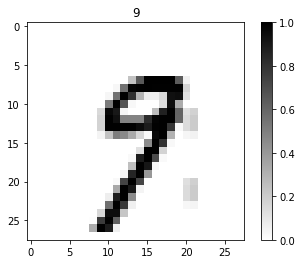

In [25]:
#Here is a sample of an image
reshape_img(X_train, y_train, 3)

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


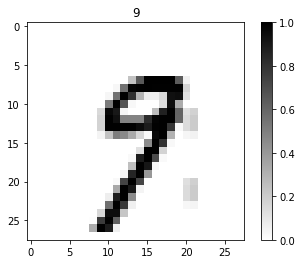

In [8]:
reshape_img(X_train, y_train, 3)

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


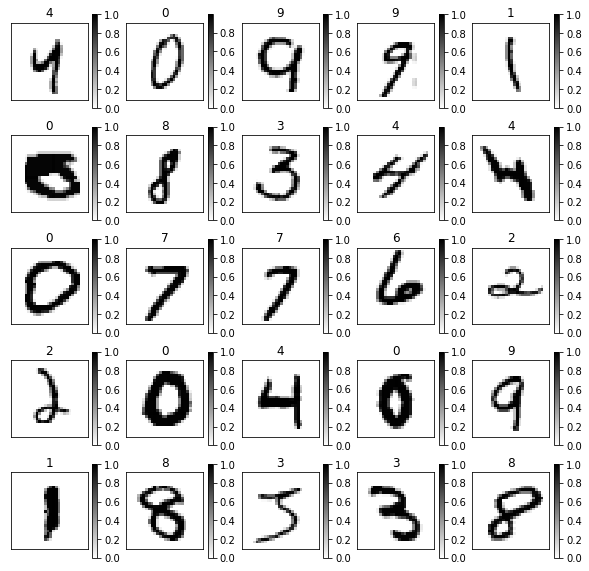

In [9]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    reshape_img(X_train, y_train, i)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

# Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

In [13]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

# Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the train_images and train_labels arrays.

2. The model learns to associate images and labels.

3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [15]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
model.fit(X_train_array, y_train_array, epochs = 5)

Epoch 1/5
29400/29400 [==============================] - 4s 139us/step - loss: 0.3427 - acc: 0.9023
Epoch 2/5
29400/29400 [==============================] - 4s 131us/step - loss: 0.1593 - acc: 0.9550
Epoch 3/5
29400/29400 [==============================] - 4s 136us/step - loss: 0.1089 - acc: 0.9678
Epoch 4/5
29400/29400 [==============================] - 4s 147us/step - loss: 0.0799 - acc: 0.9762
Epoch 5/5
29400/29400 [==============================] - 4s 146us/step - loss: 0.0602 - acc: 0.9813


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.9813 (or 98.1%) on the training data.

# Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ' + str(test_acc))

12600/12600 [==============================] - 1s 53us/step
Test Accuracy: 0.9675396825396826


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

# Make predictions
With the model trained, we can use it to make predictions about some images.

In [18]:
predictions = model.predict(X_test)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [40]:
predictions[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different numbers. We can see which label has the highest confidence value:

In [35]:
def show_predicted_img(X_train, loc):
    img = X_train.iloc[loc].as_matrix()
    img = img.reshape((28, 28))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.colorbar()
    plt.title("Predicted Label is: " + str(np.argmax(predictions[loc])))

C:\Users\john.osorio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


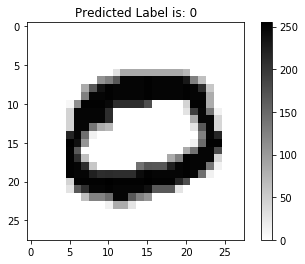

In [37]:
show_predicted_img(X_test, 1)

# Prepare the CSV to be submitted to Kaggle

In [53]:
predicted_labels = [np.argmax(x) for x in predictions]

In [66]:
index = list(range(1, len(predicted_labels) + 1))

In [68]:
pred_df = pd.DataFrame({'ImageId' : index, 'Label' : predicted_labels})

In [71]:
digit_recognizer_prediction_csv = pred_df.to_csv(r'C:\Users\john.osorio\Desktop\BLACK CAT\Kaggle Stuff\Datasets\Digit Recognizer\digit_recognizer_prediction.csv',
                                                index = None, header = True)